In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/ECG data/mitbih_train[1].csv", header = None)
test_data = pd.read_csv("/content/drive/MyDrive/ECG data/mitbih_train[1].csv", header = None)

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

In [ ]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
train_data[187].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int')

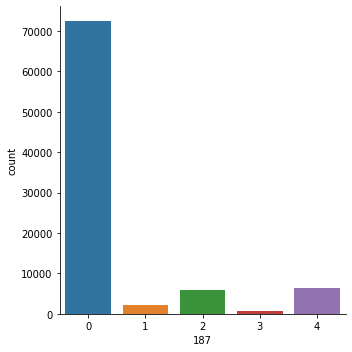

In [ ]:
sns.catplot(x= 187, kind = 'count', data = train_data)

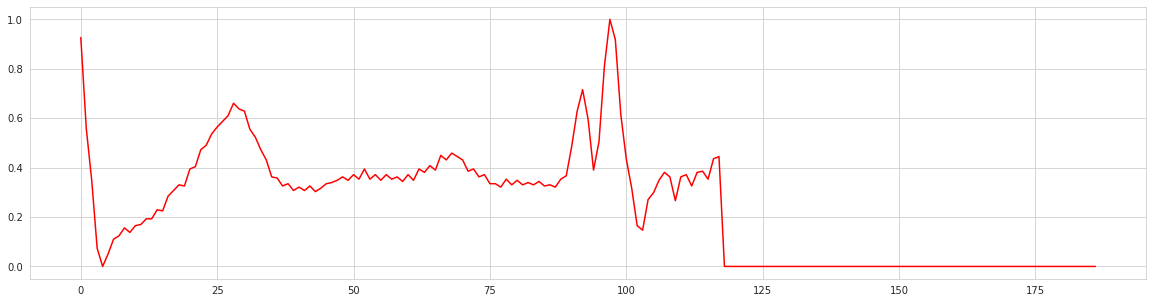

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
plt.plot(train_data.iloc[10000, 0:187], color = 'red')
plt.show()

In [ ]:
train_data.iloc[65010,187]

NameError: ignored

In [ ]:
df_0 = train_data[train_data[187] == 0]
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

In [ ]:
from sklearn.utils import resample

df_0_upsample=resample(df_0,replace=True,n_samples=20000,random_state=122)
df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

df=pd.concat([df_0_upsample,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
train_df = df

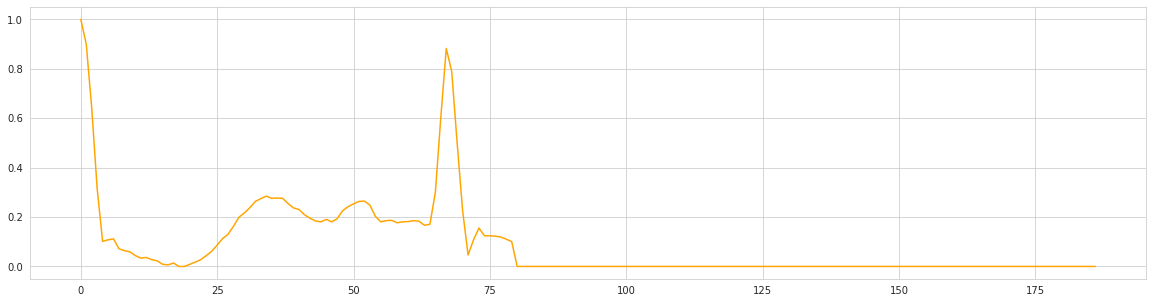

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (20,5))
plt.plot(df_3.iloc[0, 0:187], color = 'orange')
plt.show()

In [ ]:
df_3.iloc[0, 187]

3

In [ ]:
target_train = train_df[187]
target_test = test_data[187]

In [ ]:
target_train.unique()

array([0, 1, 2, 3, 4])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [ ]:
y_test = to_categorical(target_test)

In [ ]:
y_train.shape

(100000, 5)

In [ ]:
train_df.shape

(100000, 188)

In [ ]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values 

In [ ]:
X_train.shape

(100000, 187)

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,BatchNormalization,Flatten,MaxPool1D,Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model=Sequential()
input=(187,1)
model.add(Conv1D(32,(3),strides=(1),padding='same',activation='relu',input_shape=input))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Conv1D(64,(3),strides=(1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Conv1D(64,(3),strides=(1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(512,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 187, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 93, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 93, 64)            6208      
                                                                 
 batch_normalization_1 (Batc  (None, 93, 64)           256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history=model.fit(X_train, y_train,epochs=5,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
3125/3125 [==============================] - 131s 41ms/step - loss: 0.1669 - accuracy: 0.9439 - val_loss: 0.1103 - val_accuracy: 0.9630
Epoch 2/5
3125/3125 [==============================] - 128s 41ms/step - loss: 0.0626 - accuracy: 0.9793 - val_loss: 0.1398 - val_accuracy: 0.9574
Epoch 3/5
3125/3125 [==============================] - 151s 48ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 4/5
3125/3125 [==============================] - 131s 42ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0970 - val_accuracy: 0.9726
Epoch 5/5
3125/3125 [==============================] - 132s 42ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0387 - val_accuracy: 0.9900


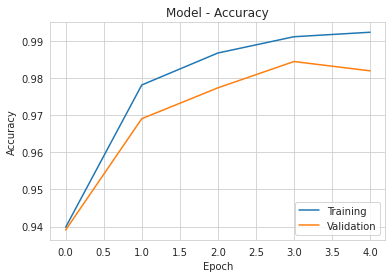

In [ ]:
import matplotlib.pyplot as plt
y_pred=model.predict(X_test)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [ ]:
predict= model.predict(X_test)
yhat= np.argmax(predict, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), yhat)

array([[71067,   689,   173,   307,   235],
       [   36,  2186,     1,     0,     0],
       [   65,     4,  5656,    53,    10],
       [    0,     0,     0,   641,     0],
       [    7,     0,     4,     0,  6420]])

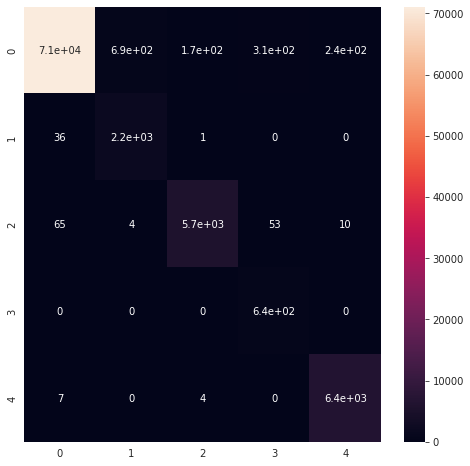

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), yhat), annot= True)

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), yhat), annot= True)

NameError: ignored